# 0. 설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 공통 모듈 임포트
import sklearn
import numpy as np
import pandas as pd

# 노트북의 실행 결과가 동일하도록
np.random.seed(42)

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns


import sys
#os: Operating System의 약자로서 운영체제에서 제공되는 여러 기능을 파이썬에서 수행할 수 있게하는 모듈
import os
#tarfile: 여러 개의 파일을 tar 형식으로 합치거나 이를 해제할 때 사용하는 모듈
import tarfile
#urllib: URL(Uniform Resource Locator)을 가져오기 위한 파이썬 모듈
import urllib.request

#1. 문제 정의 및 데이터 수집
- 캐글 데이터 출처: https://www.kaggle.com/c/bike-sharing-demand

In [3]:
# 데이터 불러오기 및 판다스 데이터프레임 객체에 담기: pd.read_csv()
data = pd.read_csv('./drive/MyDrive/06. DX 캠프 코드/5강_앙상블 모델/bike-sharing-demand/train.csv')
test = pd.read_csv('./drive/MyDrive/06. DX 캠프 코드/5강_앙상블 모델/bike-sharing-demand/test.csv')
submission = pd.read_csv('./drive/MyDrive/06. DX 캠프 코드/5강_앙상블 모델/bike-sharing-demand/sampleSubmission.csv')

#2. 점검 및 탐색

## 데이터 탐색

In [4]:
# 데이터 확인하기, 셀의 마지막줄에 객체 입력 시 확인 가능,
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [5]:
test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


- datetime: 시간 "연-월-일 시간" 데이터
- season: 계절 1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울
- holiday: 공휴일 or 주말
- workingday:공휴일, 주말을 제외한 평일
- weather:
    - 1: 매우 맑음
    - 2: 맑음
    - 3: 나쁨
    - 4: 매우 나쁨
- temp: 기온
- atemp: 체감온도
- humidity: 상대 습도
- windspeed: 바람의 세기
- casual: 미등록 사용자 렌탈량
- registered: 등록된 사용자 대여량
- count: 대여량 총 합

In [6]:
# 데이터탐색 방법: head(), tail()
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# 데이터 행, 열 개수 확인: shape
data.shape

(10886, 12)

In [8]:
# 데이터 칼럼 이름 추출: columns
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [9]:
# 특정 칼럼의 데이터 확인: dtypes
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [10]:
# 데이터 요약 자료를 전체 한눈에 확인하기: info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [12]:
#결측치 개수 확인: isnull().sum()
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [13]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [14]:
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


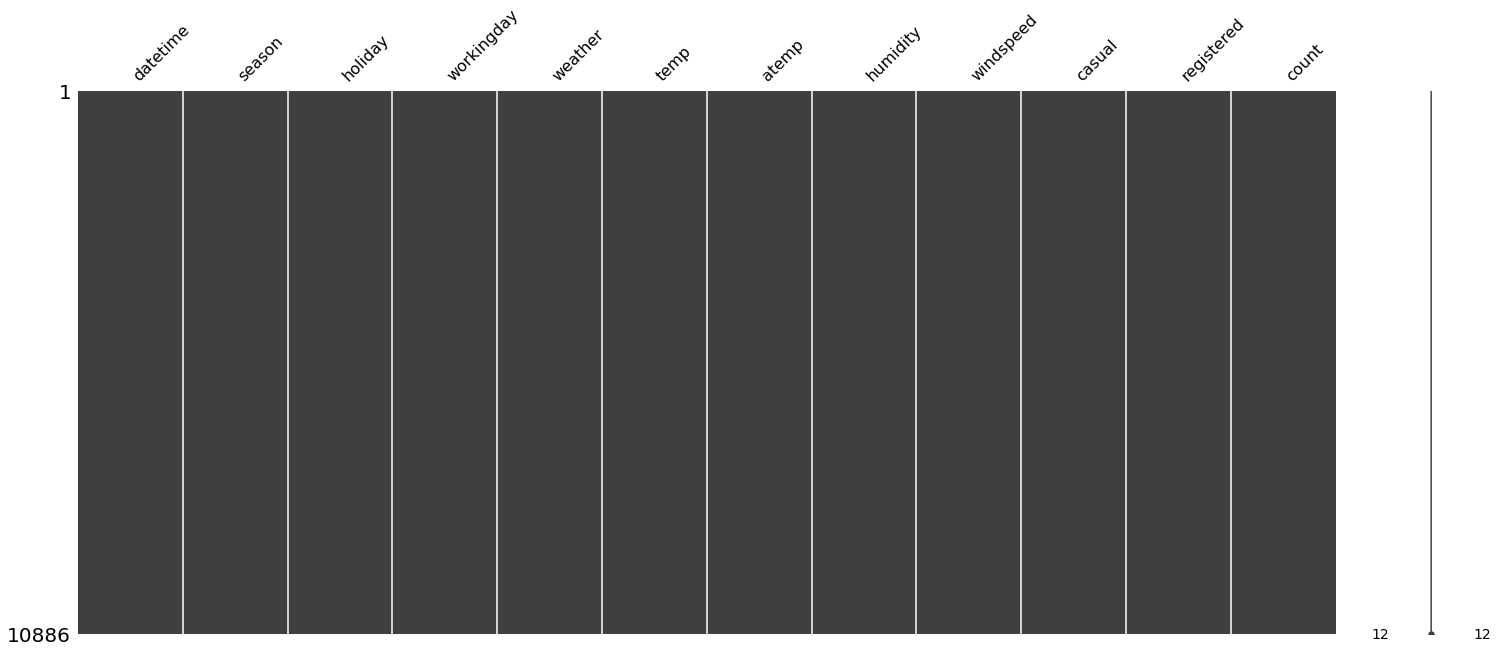

In [15]:
# 결측치 시각화 모듈: missingno - missingno.matrix()
import missingno
missingno.matrix(data)

In [16]:
# 데이터의 통계 자료 확인하기: describe()
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [17]:
!pip install --upgrade pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 268 kB 5.7 MB/s 
     |████████████████████████████████| 9.8 MB 36.9 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 690 kB 35.6 MB/s 
     |████████████████████████████████| 4.7 MB 39.1 MB/s 
     |████████████████████████████████| 102 kB 39.8 MB/s 
     |████████████████████████████████| 296 kB 28.5 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=82dd05608d409c51249c38a942fe41c4b623a9f32d0c3ce55d0b6209bcd833e4
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
Successfully built htmlmin
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
  Attempting uninstall: requests
   

In [18]:
from pandas_profiling import ProfileReport

a = ProfileReport(data, title='Pandas Profiling Report', explorative=True)
a.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#data = pd.read_csv('./drive/MyDrive/06. DX 캠프 코드/5강_앙상블 모델/bike-sharing-demand/train.csv')
#data.profile_report()

In [ ]:
# 에러 발생
data["year"] = data["datetime"].dt.year

In [20]:
# datetime변환
data["datetime"] = pd.to_datetime(data["datetime"])
test["datetime"] = pd.to_datetime(test["datetime"])

In [21]:
# feature Engineering: 시간 데이터 분리
data["year"] = data["datetime"].dt.year
data["month"] = data["datetime"].dt.month
data["day"] = data["datetime"].dt.day
data["hour"] = data["datetime"].dt.hour
data["minute"] = data["datetime"].dt.minute
data["second"] = data["datetime"].dt.second

In [22]:
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second

## 시각화

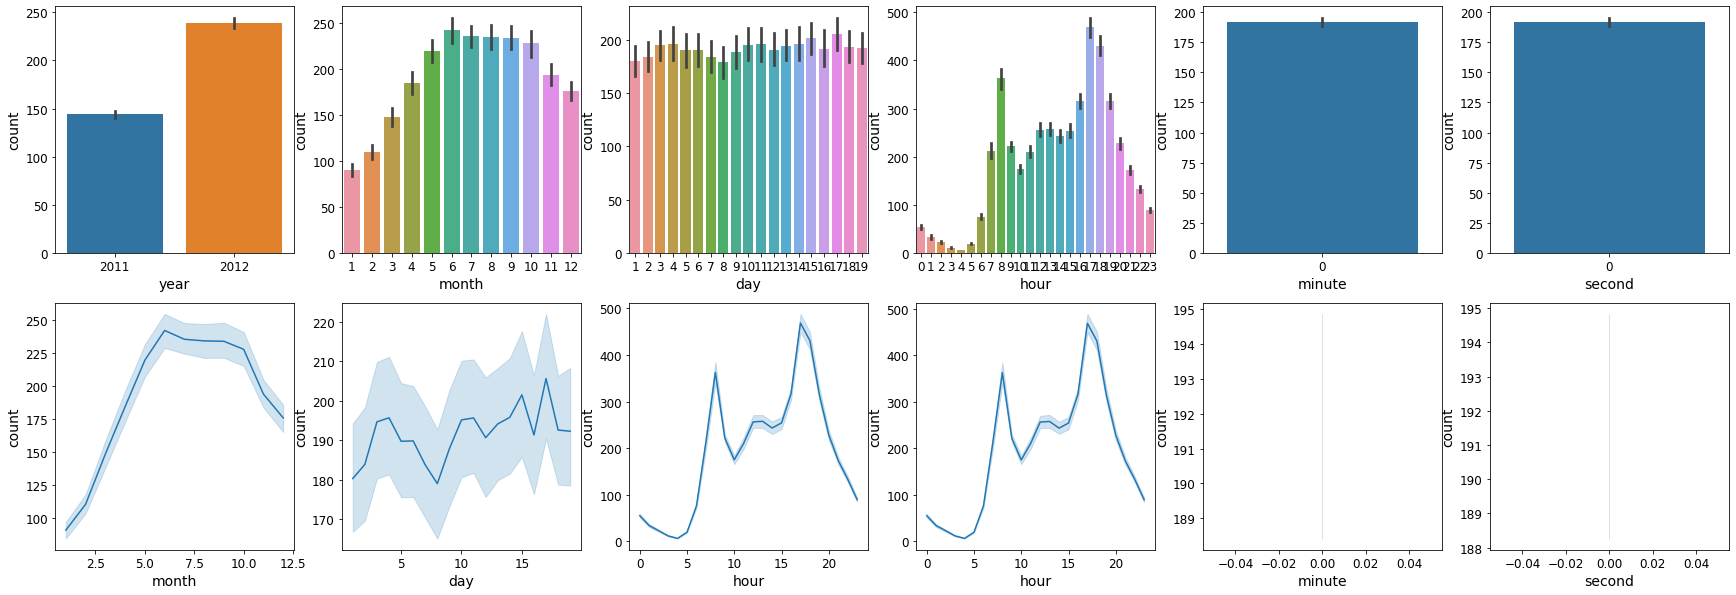

In [23]:
# 시간대별 대여량 시각화
def barplot(x, ax = None):
    sns.barplot(data=data, x=x, y = "count",ax = ax)

def lineplot(x, ax = None):
    sns.lineplot(data=data, x=x, y = "count",ax = ax)

figure, ((ax1,ax2,ax3,ax4,ax5, ax6),(ax7,ax8, ax9, ax10, ax11, ax12)) = plt.subplots(nrows=2, ncols = 6)
figure.set_size_inches(30,10)

barplot("year", ax1)
barplot("month", ax2)
barplot("day", ax3)
barplot("hour", ax4)
barplot("minute", ax5)
barplot("second", ax6)
lineplot("month", ax7)
lineplot("day", ax8)
lineplot("hour", ax9)
lineplot("hour", ax10)
lineplot("minute", ax11)
lineplot("second", ax12)

In [24]:
#연과 월을 붙여서 확인
def concatenate_year_month(datetime):
    return pd.to_datetime("{0}-{1}".format(datetime.year, datetime.month))

data["year_month"] = data["datetime"].apply(concatenate_year_month)

print(data.shape)
data[["datetime", "year_month"]].head()

(10886, 19)


,datetime,year_month
0,2011-01-01 00:00:00,2011-01-01
1,2011-01-01 01:00:00,2011-01-01
2,2011-01-01 02:00:00,2011-01-01
3,2011-01-01 03:00:00,2011-01-01
4,2011-01-01 04:00:00,2011-01-01


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

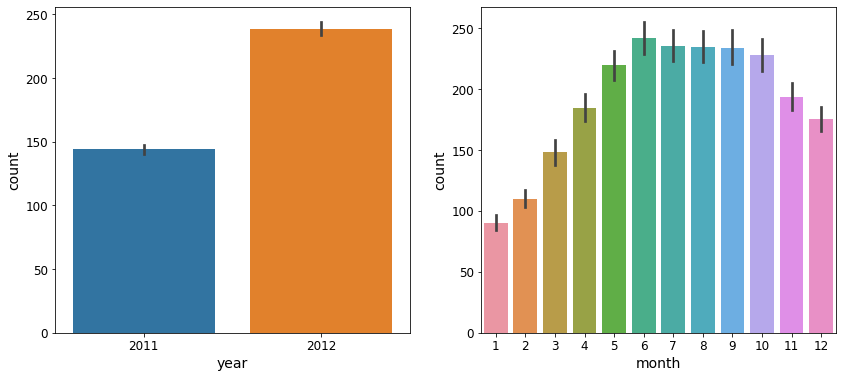

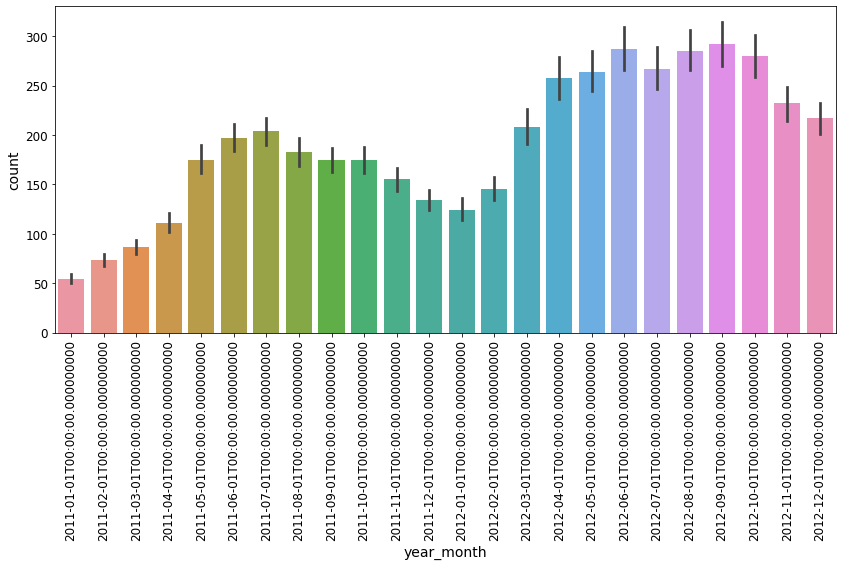

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(14, 6)

sns.barplot(data=data, x="year", y="count", ax=ax1)
sns.barplot(data=data, x="month", y="count", ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(14, 6)

sns.barplot(data=data, x="year_month", y="count", ax=ax3)
plt.xticks(rotation=90)

#fig, ax = plt.subplots(figsize = (12,6))    
#fig = sns.barplot(x = "12monthsEnding", y = "uniqueClientExits", data = emp, 
#                  estimator = sum, ci = None, ax=ax)

# seaborn datetime x axis format, 시간 데이터 텍스트 포맷
x_dates = data['year_month'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax3.set_xticklabels(labels=x_dates, rotation=45, ha='right')

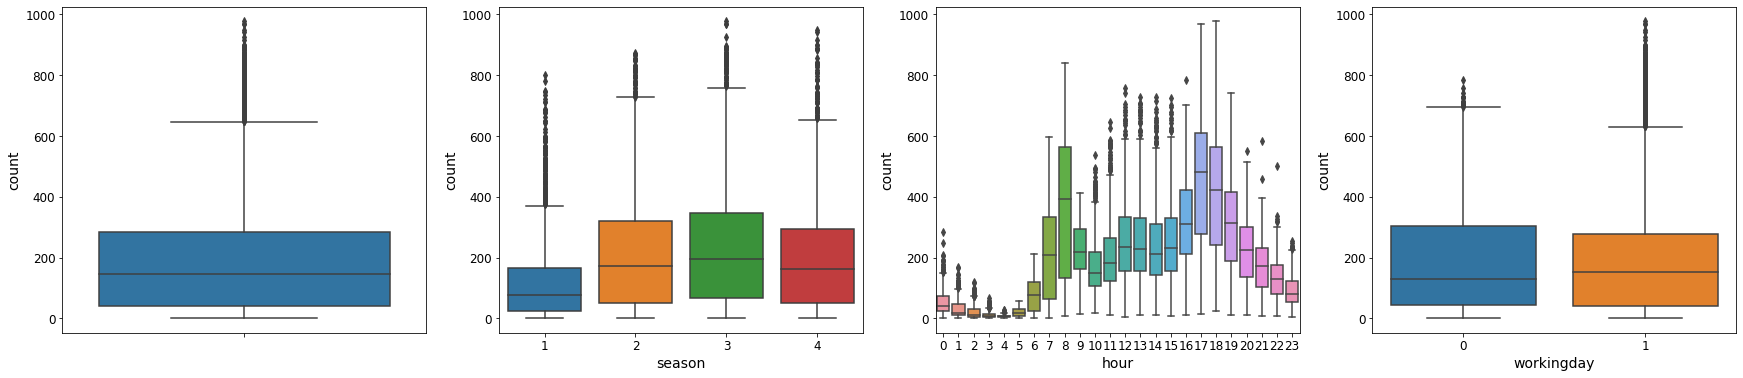

In [27]:
fig, axes = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(30, 6)
sns.boxplot(data=data,y="count",orient="v",ax=axes[0])
sns.boxplot(data=data,y="count",x="season",orient="v",ax=axes[1])
sns.boxplot(data=data,y="count",x="hour",orient="v",ax=axes[2])
sns.boxplot(data=data,y="count",x="workingday",orient="v",ax=axes[3])

In [28]:
data["dayofweek"] = data["datetime"].dt.dayofweek
data.shape

(10886, 20)

In [29]:
test["dayofweek"] = test["datetime"].dt.dayofweek
test.shape

(6493, 16)

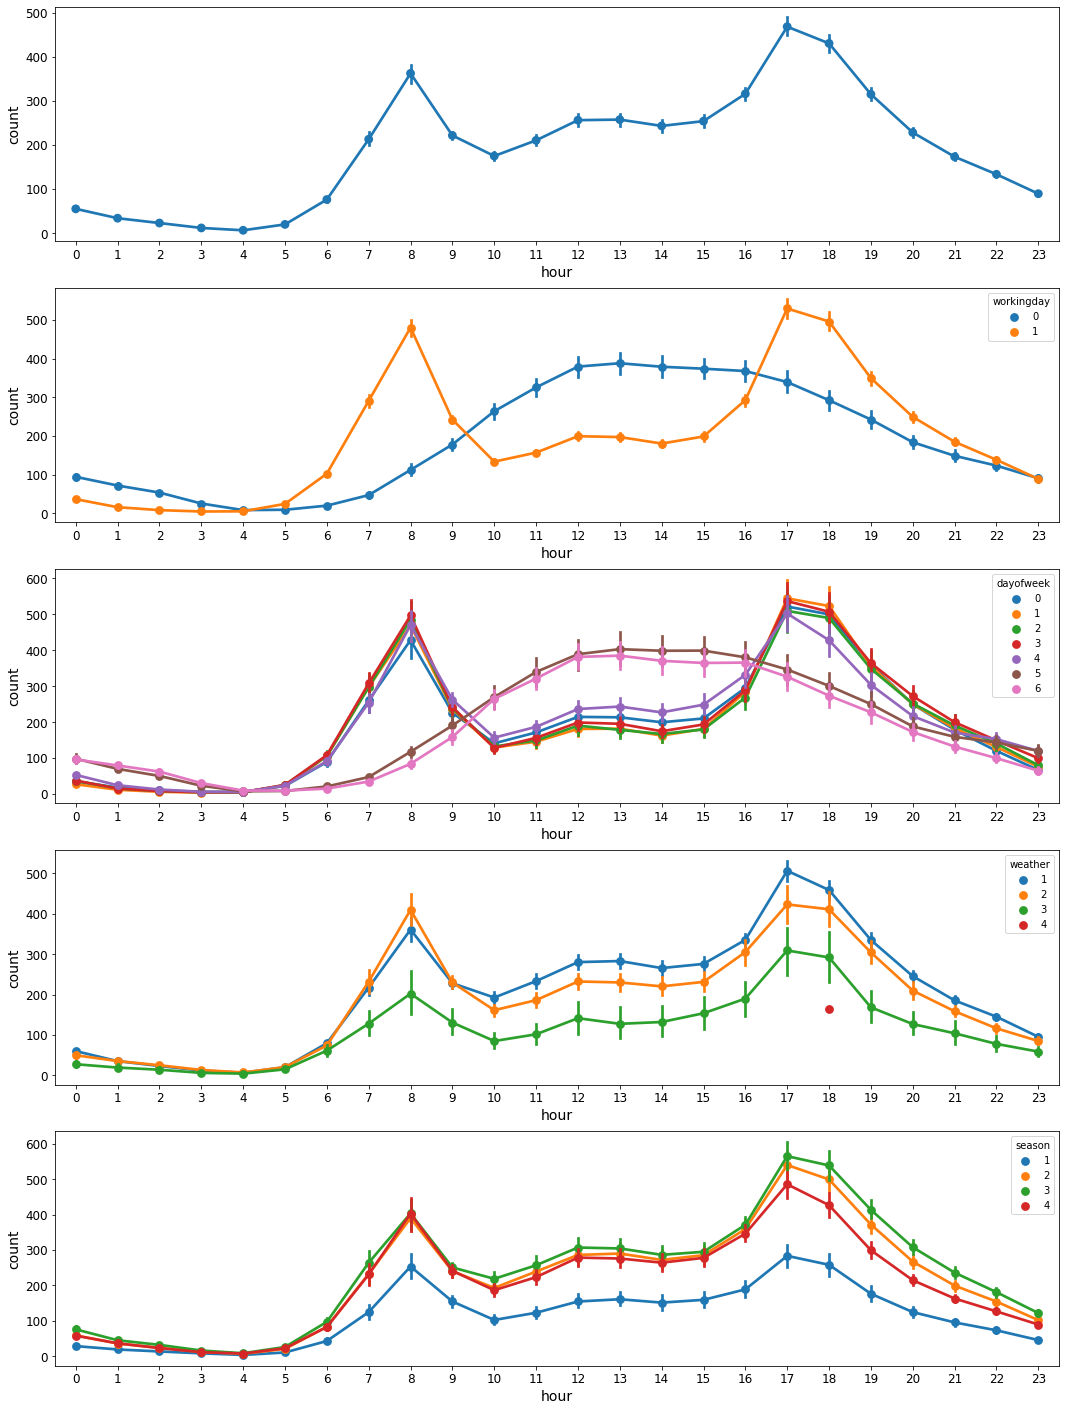

In [30]:
# pointplot 으로 시간대별, 대여량을 worjingday, datofweek, weather, season 별로 확인해보자.

fig,(ax1,ax2,ax3,ax4,ax5)= plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=data, x="hour", y="count", ax=ax1)
sns.pointplot(data=data, x="hour", y="count", hue="workingday", ax=ax2)
sns.pointplot(data=data, x="hour", y="count", hue="dayofweek", ax=ax3)
sns.pointplot(data=data, x="hour", y="count", hue="weather", ax=ax4)
sns.pointplot(data=data, x="hour", y="count", hue="season", ax=ax5)

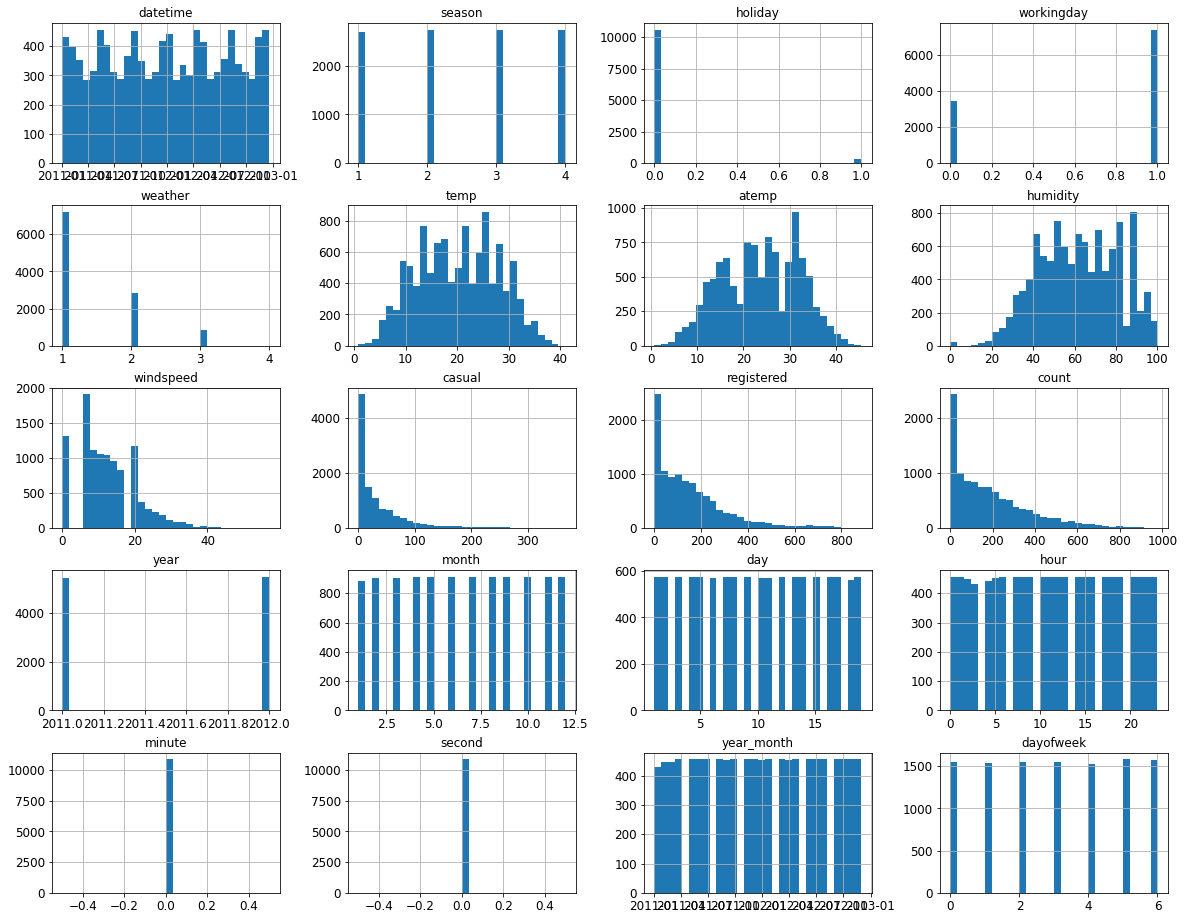

In [31]:
data.hist(bins=30, figsize=(20,16))
plt.show()

In [32]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'year_month',
       'dayofweek'],
      dtype='object')

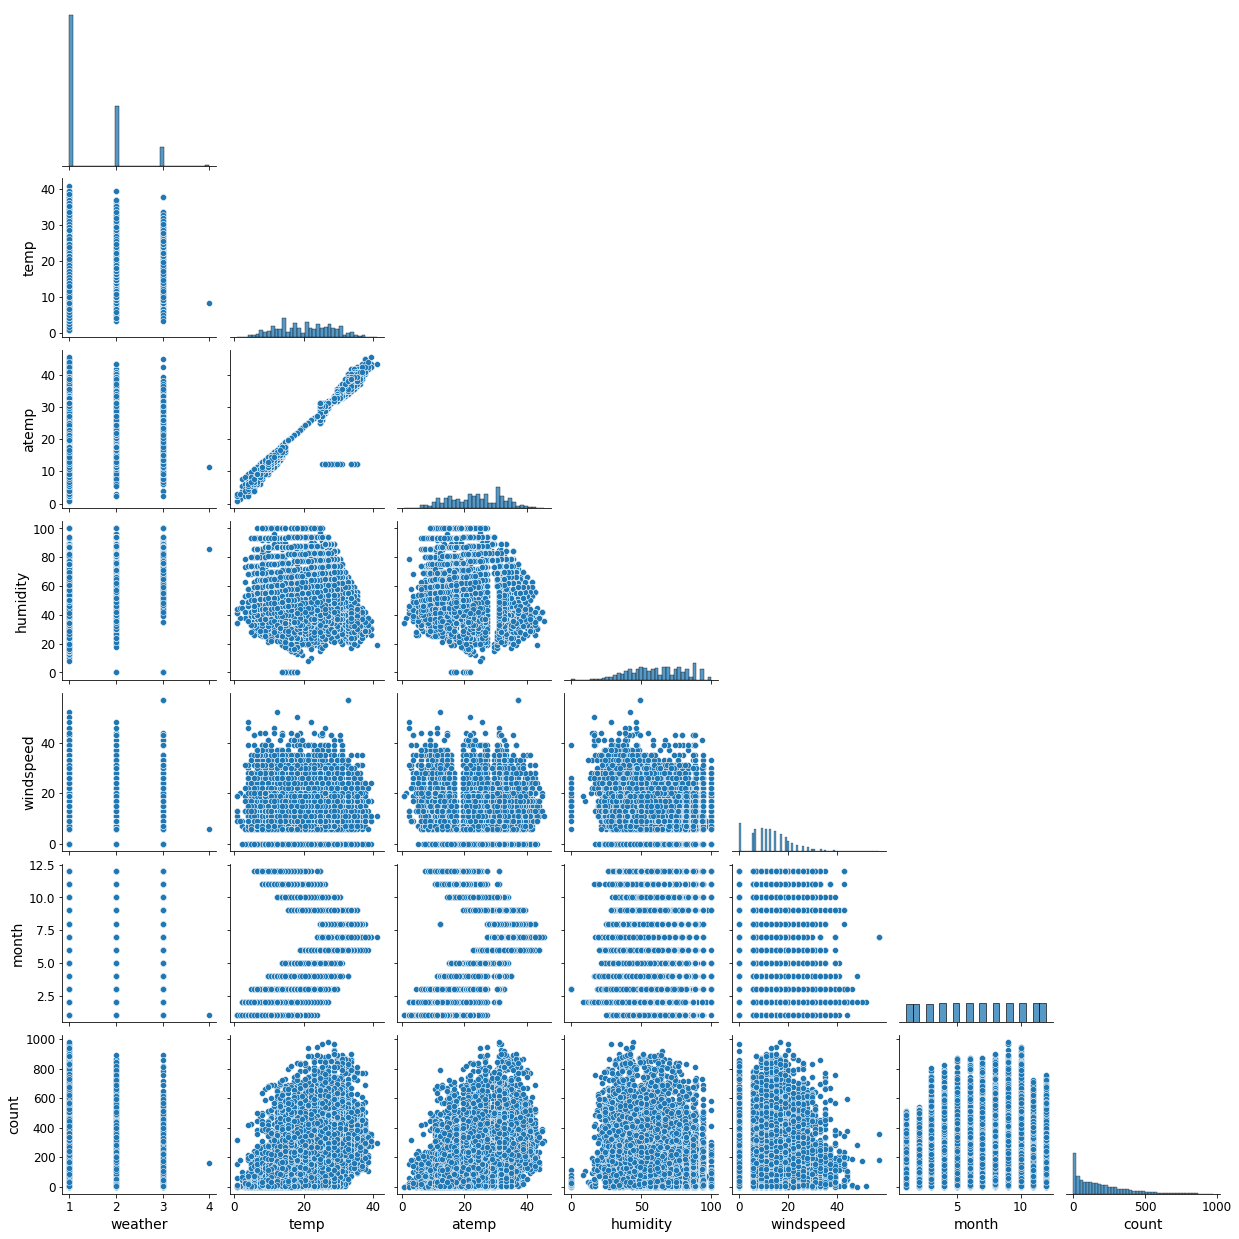

In [33]:
# 산점도와 히스토그램을 같이 확인하고 싶을 때:
sns.pairplot(data[['weather', 'temp', 'atemp', 'humidity', 'windspeed','month','count']], corner = True)

In [34]:
# 상관분석: 
data[['weather', 'temp', 'atemp', 'humidity', 'windspeed','month','count']].corr()

,weather,temp,atemp,humidity,windspeed,month,count
weather,1.000000,-0.055035,-0.055376,0.406244,0.007261,0.012144,-0.128655
temp,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.257589,0.394454
atemp,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.264173,0.389784
humidity,0.406244,-0.064949,-0.043536,1.000000,-0.318607,0.204537,-0.317371
windspeed,0.007261,-0.017852,-0.057473,-0.318607,1.000000,-0.150192,0.101369
month,0.012144,0.257589,0.264173,0.204537,-0.150192,1.000000,0.166862
count,-0.128655,0.394454,0.389784,-0.317371,0.101369,0.166862,1.000000


In [35]:
corr_matrix = data[['weather', 'temp', 'atemp', 'humidity', 'windspeed','month','count']].corr()
corr_matrix["count"].sort_values(ascending=False)

count        1.000000
temp         0.394454
atemp        0.389784
month        0.166862
windspeed    0.101369
weather     -0.128655
humidity    -0.317371
Name: count, dtype: float64

**cmap 관련 예제**
- 참고 자료: https://wikidocs.net/141538

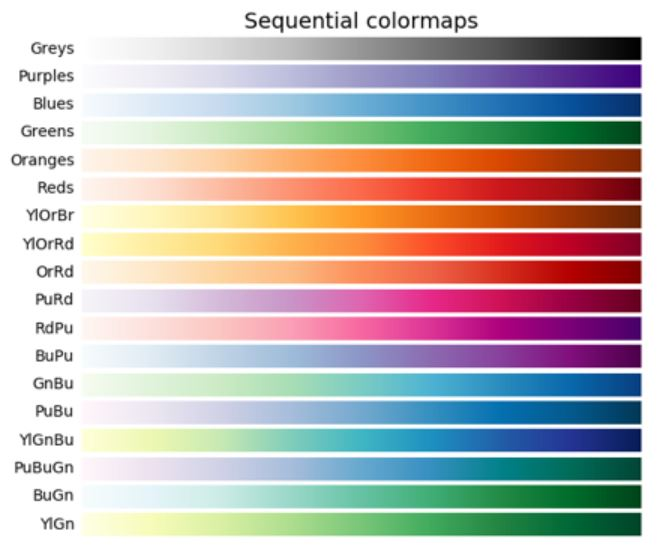

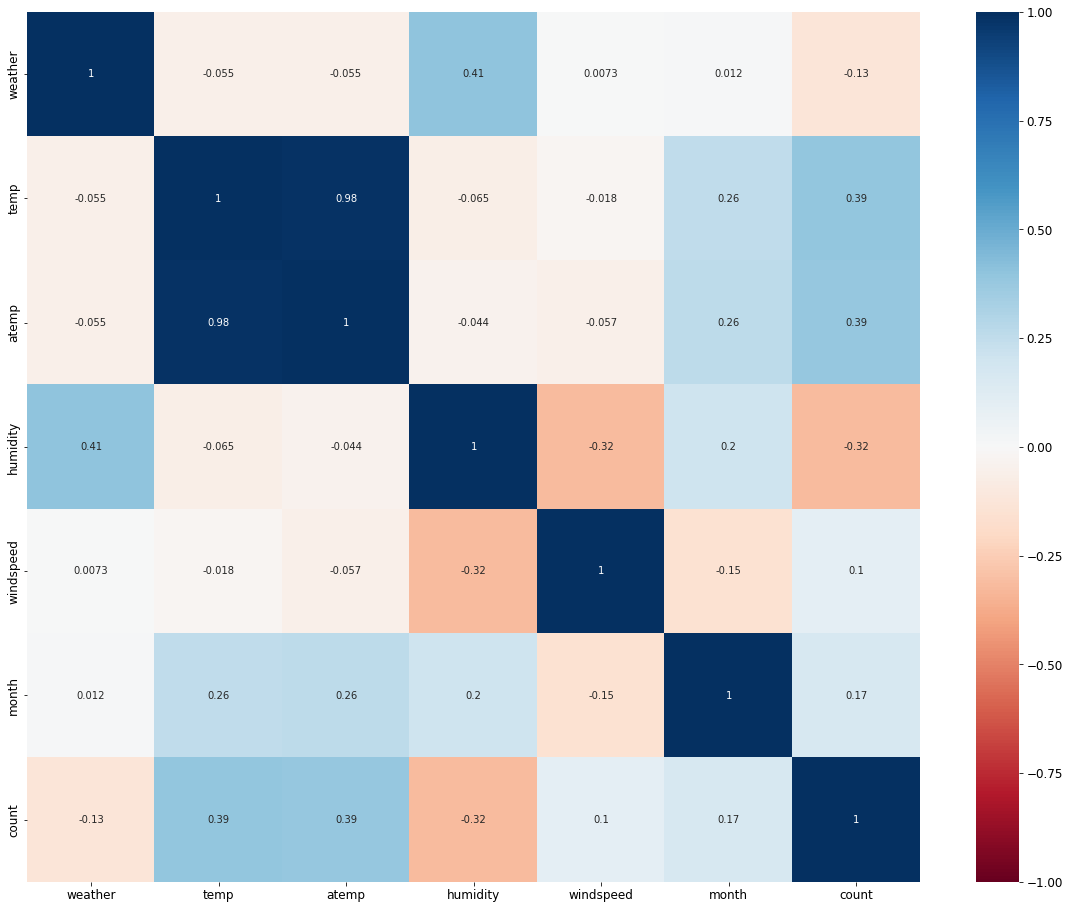

In [36]:
# 상관분석의 시각화: 
plt.figure(figsize=(20,16))
sns.heatmap(corr_matrix, annot = True, cmap='RdBu', vmax = 1, vmin = -1)

#3. 전처리 및 정제

In [37]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
minute        0
second        0
year_month    0
dayofweek     0
dtype: int64

## Count

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.018)

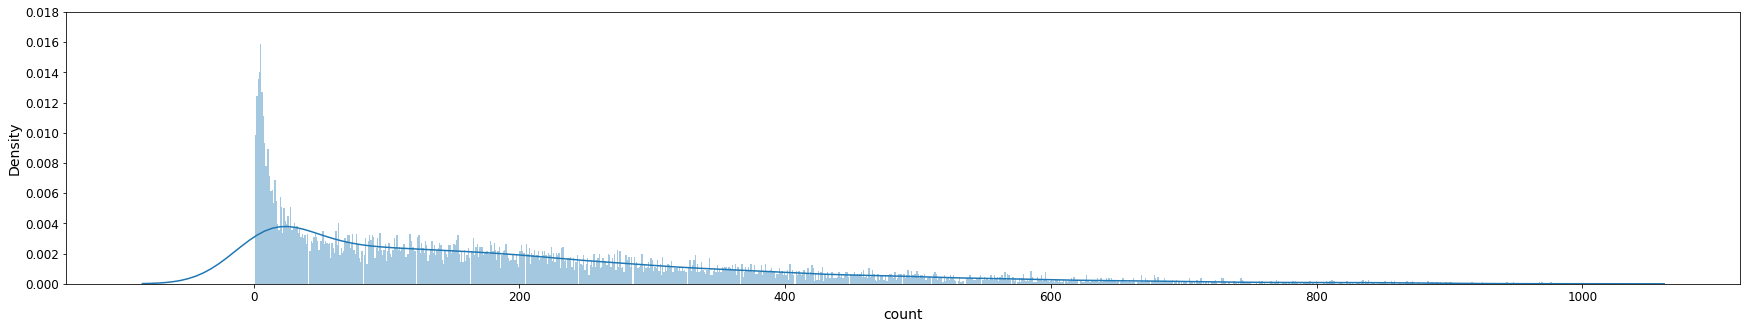

In [38]:
# 이상값
plt.figure(figsize=(30,5))
sns.distplot(data['count'], bins = 1000)
plt.ylim([0, 0.018])

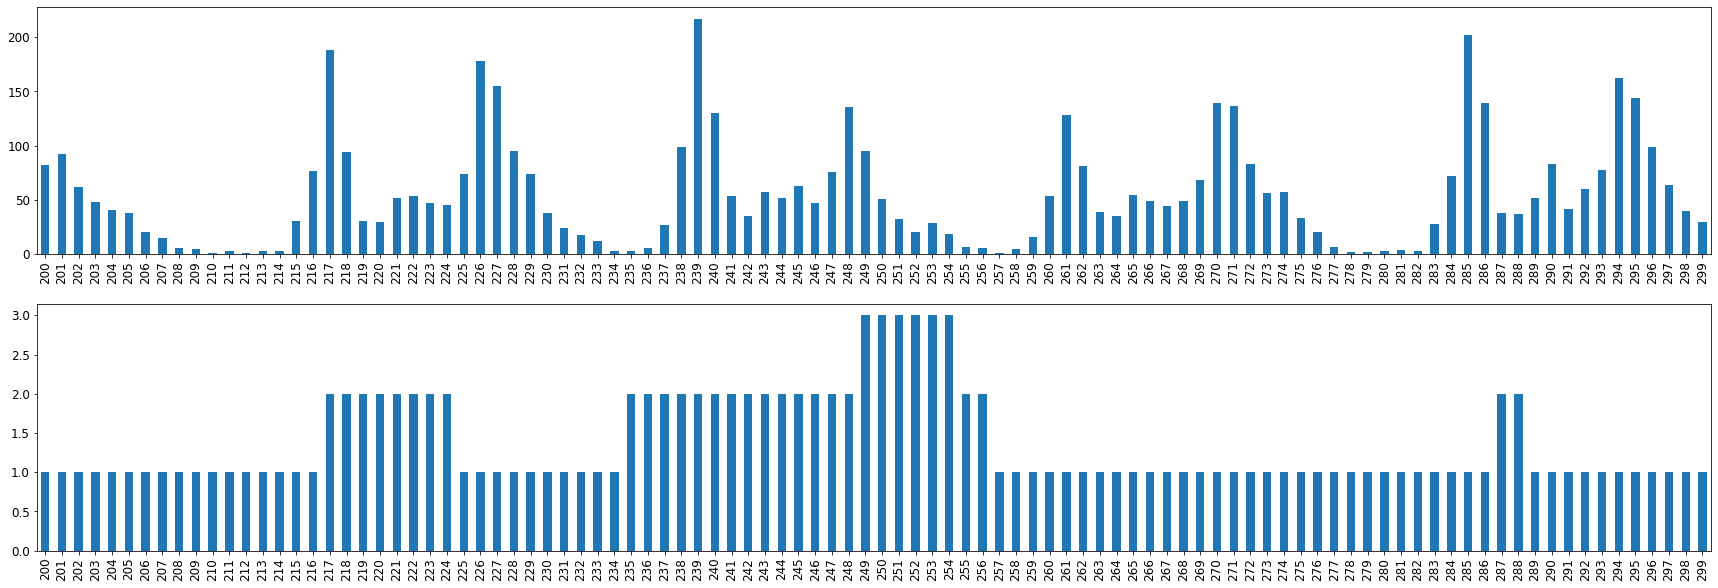

In [39]:
# 날씨와 대여수의 상관관계 확인
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(30,10)
data['count'][200:300].plot.bar(ax = ax1)
data['weather'][200:300].plot.bar(ax = ax2)

plt.show()

In [40]:
len(data['count'])

10886

In [41]:
data2 = data.drop(data[data['count']<10].index, axis = 0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 0.018)

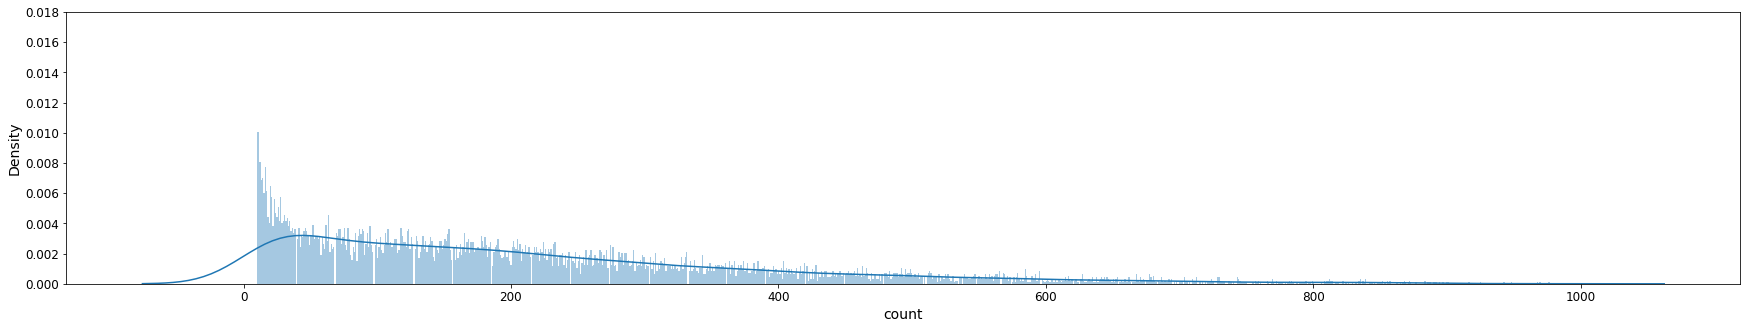

In [42]:
plt.figure(figsize=(30,5))
sns.distplot(data2['count'], bins = 1000)
plt.ylim([0, 0.018])

## Wind Speed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


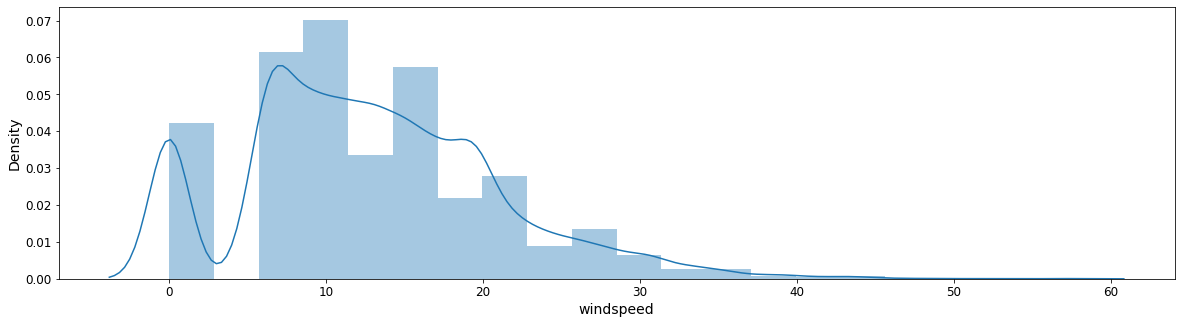

In [43]:
# 이상값
plt.figure(figsize=(20,5))
sns.distplot(data['windspeed'], bins = 20)

In [44]:
data2.drop(data2[data2["windspeed"]< 5].index, axis = 0, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


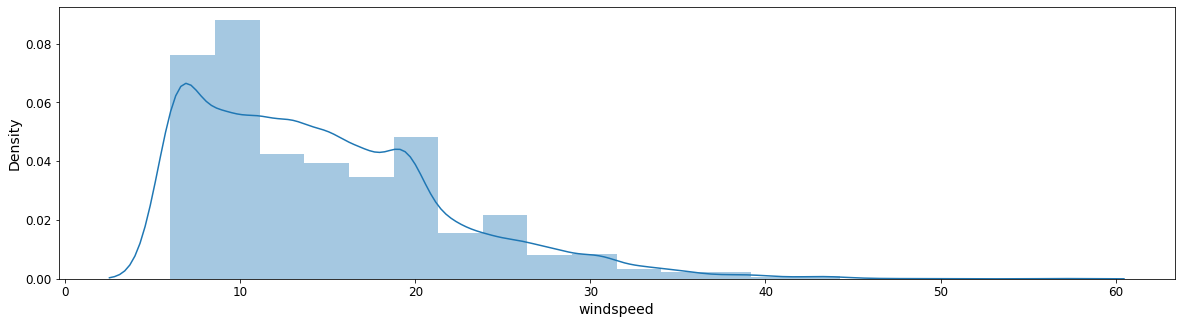

In [45]:
plt.figure(figsize=(20,5))
sns.distplot(data2["windspeed"], bins = 20)

## temp, atemp
- 다중공선성: 회귀 분석에서 사용된 모형의 일부 설명 변수가 다른 설명 변수와 상관 정도가 높아, 데이터 분석 시 부정적인 영향을 미치는 현상.

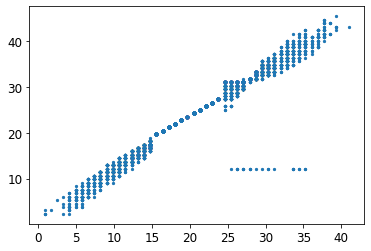

In [46]:
plt.scatter(data2["temp"], data2["atemp"], s = 5)

In [47]:
data2[["temp", "atemp"]].corr()

,temp,atemp
temp,1.000000,0.984107
atemp,0.984107,1.000000


In [48]:
data.drop('atemp', axis = 1, inplace = True)
data2.drop('atemp', axis = 1, inplace = True)

In [49]:
test.drop('atemp', axis = 1, inplace = True)

In [ ]:
#OrdinalEncoder vs OnehotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# OrdinalEncoder
#ordinal_encoder = OrdinalEncoder()
#data_cat_encoded = ordinal_encoder.fit_transform(data)
#data_cat_encoded

# OnehotEncoder, 결과값이 희소행렬로 반환되기에 데이터를 확인하고 싶다면 .toarray()를 사용하여 배열로 변환해야함.처음부터 배열로 반환하려면 sparse = False 부여
#cat_encoder = OneHotEncoder(sparse = False)
#data_cat_1hot = cat_encoder.fit_transform(data)
#data_cat_1hot 

In [ ]:
# 데이터 변환 => 정규화, 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler()
#scaler.fit(data)
#data_scaled = scaler.transform(data) 

#scaler = MinMaxScaler()
#scaler.fit(data)
#data_scaled = scaler.transform(data)

#data = pd.DataFrame(data_scaled, columns=data.feature_names) 

In [50]:
data

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,year_month,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,3,13,16,2011,1,1,0,0,0,2011-01-01,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,8,32,40,2011,1,1,1,0,0,2011-01-01,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,5,27,32,2011,1,1,2,0,0,2011-01-01,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,3,10,13,2011,1,1,3,0,0,2011-01-01,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0000,0,1,1,2011,1,1,4,0,0,2011-01-01,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,7,329,336,2012,12,19,19,0,0,2012-12-01,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,10,231,241,2012,12,19,20,0,0,2012-12-01,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,4,164,168,2012,12,19,21,0,0,2012-12-01,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,61,6.0032,12,117,129,2012,12,19,22,0,0,2012-12-01,2


In [51]:
# 제거 컬럼 datetime, day, minute, second year_month
columns = ['season', 'holiday', 'workingday','weather','temp','humidity', 'windspeed', 'year','month', 'hour', 'dayofweek', 'count']
data = data[columns]
data2 = data2[columns]

In [69]:
columns = ['season', 'holiday', 'workingday','weather','temp','humidity', 'windspeed', 'year','month', 'hour', 'dayofweek']
test = test[columns]

In [52]:
# 데이터 분리
from sklearn.model_selection import train_test_split

# 훈련셋과 트레이닝셋 X,Y 동시에 분리
X_train, X_test, y_train, y_test = train_test_split(data.drop('count', axis=1), data['count'])
X2_train, X2_test, y2_train, y2_test = train_test_split(data2.drop('count', axis=1), data2['count'])

In [66]:
test

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,56,26.0027,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,56,0.0000,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,56,0.0000,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,56,11.0014,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,56,11.0014,2011,1,20,4,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,60,11.0014,2012,12,31,19,0,0,0
6489,2012-12-31 20:00:00,1,0,1,2,10.66,60,11.0014,2012,12,31,20,0,0,0
6490,2012-12-31 21:00:00,1,0,1,1,10.66,60,11.0014,2012,12,31,21,0,0,0
6491,2012-12-31 22:00:00,1,0,1,1,10.66,56,8.9981,2012,12,31,22,0,0,0


#4. 모델링 및 훈련

In [53]:
# 머신러닝 알고리즘 - 회귀
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [54]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [55]:
forest_reg2 = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg2.fit(X2_train, y2_train)

RandomForestRegressor(random_state=42)

In [56]:
# MSE, RMSE
from sklearn.metrics import mean_squared_error

data_predictions = forest_reg.predict(X_test)
mse = mean_squared_error(y_test, data_predictions)
rmse = np.sqrt(mse)
rmse

39.40340527021607

In [57]:
data_predictions = forest_reg2.predict(X2_test)
mse = mean_squared_error(y2_test, data_predictions)
rmse = np.sqrt(mse)
rmse

43.353166673261725

##결과 시각화

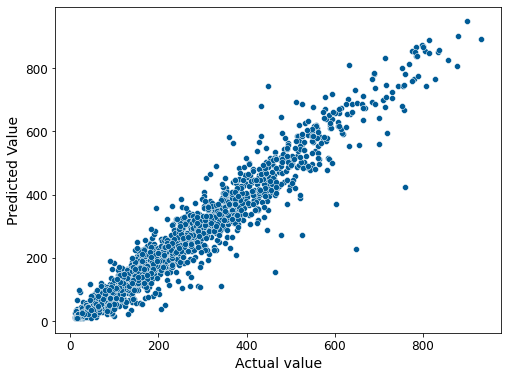

In [58]:
plt.figure(figsize= (8, 6))
sns.scatterplot(x= data_predictions, y= y2_test, color= '#005b96')
plt.xlabel('Actual value')
plt.ylabel('Predicted Value')
plt.show()

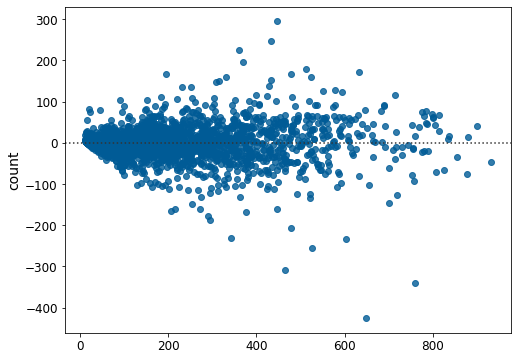

In [59]:
plt.figure(figsize= (8, 6))
sns.residplot(x= data_predictions, y = y2_test, color= '#005b96')
plt.show()

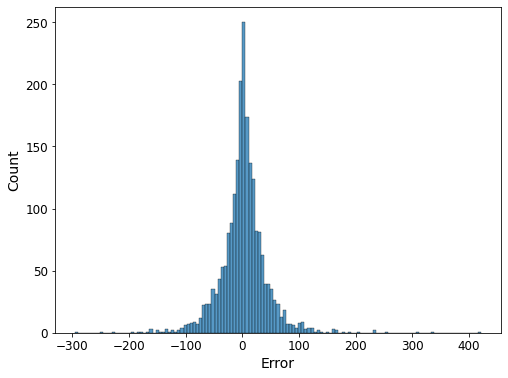

In [60]:
resid = data_predictions - y2_test
plt.figure(figsize= (8, 6))
sns.histplot(resid)
plt.xlabel('Error');

# 부스팅 계열 학습

In [61]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

In [62]:
GB_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
GB_reg.fit(X_train, y_train)

data_predictions = GB_reg.predict(X_test)
GBmse = mean_squared_error(y_test, data_predictions)
GBrmse = np.sqrt(GBmse)
GBrmse

65.69452172037049

In [63]:
XGB_reg = XGBRegressor(n_estimators=100, random_state=42)
XGB_reg.fit(X_train, y_train)

data_predictions = XGB_reg.predict(X_test)
XGBmse = mean_squared_error(y_test, data_predictions)
XGBrmse = np.sqrt(XGBmse)
XGBrmse

[06:20:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


66.58306766810693

In [64]:
LGBM_reg = LGBMRegressor(n_estimators=100, random_state=42)
LGBM_reg.fit(X_train, y_train)

data_predictions = LGBM_reg.predict(X_test)
LGBMmse = mean_squared_error(y_test, data_predictions)
LGBMrmse = np.sqrt(LGBMmse)
LGBMrmse

37.914288732867405

#6. 최종 답안 저장

In [68]:
test

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,56,26.0027,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,56,0.0000,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,56,0.0000,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,56,11.0014,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,56,11.0014,2011,1,20,4,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,60,11.0014,2012,12,31,19,0,0,0
6489,2012-12-31 20:00:00,1,0,1,2,10.66,60,11.0014,2012,12,31,20,0,0,0
6490,2012-12-31 21:00:00,1,0,1,1,10.66,60,11.0014,2012,12,31,21,0,0,0
6491,2012-12-31 22:00:00,1,0,1,1,10.66,56,8.9981,2012,12,31,22,0,0,0


In [70]:
submission = pd.read_csv('./drive/MyDrive/06. DX 캠프 코드/5강_앙상블 모델/bike-sharing-demand/sampleSubmission.csv')
submission['count'] = LGBM_reg.predict(test)

In [71]:
submission

,datetime,count
0,2011-01-20 00:00:00,13.724661
1,2011-01-20 01:00:00,8.669401
2,2011-01-20 02:00:00,5.035072
3,2011-01-20 03:00:00,3.977114
4,2011-01-20 04:00:00,3.977114
...,...,...
6488,2012-12-31 19:00:00,238.890463
6489,2012-12-31 20:00:00,167.597303
6490,2012-12-31 21:00:00,146.446406
6491,2012-12-31 22:00:00,104.814742


In [72]:
submission['count'][submission['count'] < 0] = 0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
submission[submission['count'] < 0]

,datetime,count


In [74]:
submission.to_csv('submission_output.csv', index = False) #, quoting = 3)

In [ ]:
submission[20:30]

,datetime,count
20,2011-01-20 20:00:00,59.983290
21,2011-01-20 21:00:00,53.503038
22,2011-01-20 22:00:00,45.854974
23,2011-01-20 23:00:00,31.456349
24,2011-01-21 00:00:00,13.242614
25,2011-01-21 01:00:00,5.124320
26,2011-01-21 02:00:00,0.000000
27,2011-01-21 03:00:00,0.000000
28,2011-01-21 04:00:00,0.678240
29,2011-01-21 05:00:00,6.883099
